In [1]:
!pip install pyod

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


## 가상데이터 생성

In [10]:
from pyod.utils.data import generate_data
from pyod.utils.example import visualize
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/opt/conda/lib/python3.8/site-packages/pyod/utils/data.py:186: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


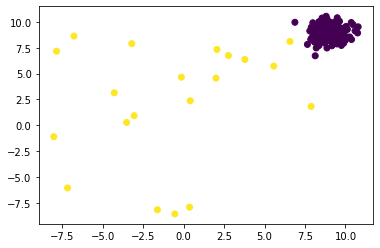

In [11]:

import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

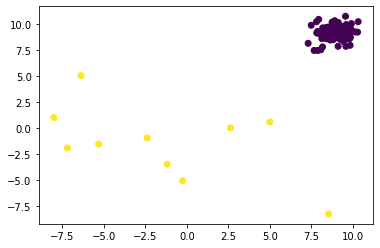

In [12]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

## 이상탐지 모듈 불러오기

In [13]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.lof import LOF

## 학습

In [14]:
clf = KNN() ## 다른 모듈들도 바꾸어가며 돌려보자
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [15]:
y_pred=clf.predict(X_test)

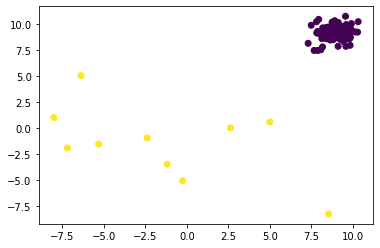

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## 이상치 평가

In [17]:
from sklearn.metrics import roc_auc_score

score=clf.predict_proba(X_test)[:,1] ## 이상치일 확률
roc_auc_score(y_test,score) ## 확률값에 따른 ROC_AUC 계산

1.0